<a href="https://colab.research.google.com/github/xcaracal/CS110-Week-2-Exercise/blob/master/CS173_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [ ]:
import nltk

# Download the 'punkt' resource
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
f_path = '/content/drive/MyDrive/hw3'

In [ ]:
import pandas as pd

# Read the CSV file
data = pd.read_csv('/content/drive/MyDrive/Sheet1.csv')

train_data = data[:30]
validation_data = data[30:40]
test_data = data[40:50]

train_data = train_data.dropna()
validation_data = validation_data.dropna()
test_data = test_data.dropna()



# Save each set to a separate CSV file
train_data.to_csv('train.csv', index=False)
validation_data.to_csv('validation.csv', index=False)
test_data.to_csv('test.csv', index=False)

In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')

# Read in CSV file
data = pd.read_csv('/content/drive/MyDrive/Sheet1.csv')

# Define a function to tokenize text
def tokenize_text(text):
    if isinstance(text, str):
        tokens = nltk.word_tokenize(text)
    else:
        tokens = []
    return tokens

# Apply tokenization to each row of text
data['tokens'] = data['Sadness + Joy + Fear Sentences'].apply(tokenize_text)

# Save the modified CSV file
data.to_csv('/content/drive/MyDrive/Sheet1.csv', index=False)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
for i, row in data.iterrows():
    print(row['tokens'])

In [ ]:
# Calculate priors for each emotion category



fear_count = len(train_data['Fear Sentences']) + len(train_data['Fear + Anger Sentences']) + len(train_data['Sadness + Joy + Fear Sentences'])
anger_count = len(train_data['Anger Sentences']) + len(train_data['Fear + Anger Sentences'])
surprise_count = len(train_data['Surprise Sentence']) + len(train_data['Surprise + Disgust Sentences'])
disgust_count = len(train_data['Disgust Sentences'])+ len(train_data['Surprise + Disgust Sentences'])
sadness_count = len(train_data['Sadness Sentences']) + len(train_data['Sadness + Joy + Fear Sentences']) + len(train_data['Sadness + Joy Sentences'])
joy_count = len(train_data['Joy Sentences']) + len(train_data['Sadness + Joy + Fear Sentences']) + len(train_data['Sadness + Joy Sentences'])
num_sentences = len(train_data['Fear Sentences']) + len(train_data['Fear + Anger Sentences']) + len(train_data['Sadness + Joy + Fear Sentences']) + len(train_data['Anger Sentences']) + len(train_data['Surprise Sentence']) + len(train_data['Surprise + Disgust Sentences']) + len(train_data['Disgust Sentences'])+len(train_data['Sadness Sentences']) + len(train_data['Sadness + Joy + Fear Sentences']) + len(train_data['Sadness + Joy Sentences']) +len(train_data['Joy Sentences'])

p_fear = fear_count / num_sentences
p_anger = anger_count / num_sentences
p_surprise = surprise_count / num_sentences
p_disgust = disgust_count / num_sentences
p_sadness = sadness_count / num_sentences
p_joy = joy_count / num_sentences

# Print priors for each emotion category
print("P(Fear) = ", p_fear)
print("P(Anger) = ", p_anger)
print("P(Surprise) = ", p_surprise)
print("P(Disgust) = ", p_disgust)
print("P(Sadness) = ", p_sadness)
print("P(Joy) = ", p_joy)


P(Fear) =  0.2727272727272727
P(Anger) =  0.18181818181818182
P(Surprise) =  0.18181818181818182
P(Disgust) =  0.18181818181818182
P(Sadness) =  0.2727272727272727
P(Joy) =  0.2727272727272727


In [ ]:
import pandas as pd
import nltk
from collections import Counter

# Load the emotion lexicon data
lexicon_df = pd.read_csv('/content/drive/MyDrive/Sheet1.csv')

# Extract the lexicons and sentences for each emotion category
fear_lexicons = lexicon_df["Fear Lexicons"].dropna().tolist()
fear_sentences = lexicon_df["Fear Sentences"].dropna().tolist()

anger_lexicons = lexicon_df["Anger Lexicons"].dropna().tolist()
anger_sentences = lexicon_df["Anger Sentences"].dropna().tolist()

surprise_lexicons = lexicon_df["Surprise Lexicons"].dropna().tolist()
surprise_sentences = lexicon_df["Surprise Sentence"].dropna().tolist()

disgust_lexicons = lexicon_df["Disgust Lexicons"].dropna().tolist()
disgust_sentences = lexicon_df["Disgust Sentences"].dropna().tolist()

sadness_lexicons = lexicon_df["Sadness Lexicons"].dropna().tolist()
sadness_sentences = lexicon_df["Sadness Sentences"].dropna().tolist()

joy_lexicons = lexicon_df["Joy Lexicons"].dropna().tolist()
joy_sentences = lexicon_df["Joy Sentences"].dropna().tolist()

# Tokenize the lexicons and sentences
fear_tokens = nltk.word_tokenize(" ".join(fear_lexicons + fear_sentences))
anger_tokens = nltk.word_tokenize(" ".join(anger_lexicons + anger_sentences))
surprise_tokens = nltk.word_tokenize(" ".join(surprise_lexicons + surprise_sentences))
disgust_tokens = nltk.word_tokenize(" ".join(disgust_lexicons + disgust_sentences))
sadness_tokens = nltk.word_tokenize(" ".join(sadness_lexicons + sadness_sentences))
joy_tokens = nltk.word_tokenize(" ".join(joy_lexicons + joy_sentences))

# Create a set of all unique words
vocabulary = set(fear_tokens + anger_tokens + surprise_tokens + disgust_tokens + sadness_tokens + joy_tokens)

# Count the occurrences of each word in each emotion category
fear_counts = Counter(fear_tokens)
anger_counts = Counter(anger_tokens)
surprise_counts = Counter(surprise_tokens)
disgust_counts = Counter(disgust_tokens)
sadness_counts = Counter(sadness_tokens)
joy_counts = Counter(joy_tokens)

#3.1:---------------------------------------------------------------------------------------------------------------------------------------
#Make sure you have already run calculations of the priors of each emotion category.
#copy/paste implementation of code into code cell
#run
#six dictionaries are made containing likelyhoods
#can access specific emotion category using variable name

# Calculate the likelihood of each word given an emotion category using Laplace smoothing
k = 1  # Laplace smoothing constant
fear_likelihoods = {}
for word in vocabulary:
    count = fear_counts[word]
    likelihood = (count + k) / (len(fear_tokens) + len(vocabulary) * k)
    fear_likelihoods[word] = likelihood

k = 1  # Laplace smoothing constant
anger_likelihoods = {}
for word in vocabulary:
    count = anger_counts[word]
    likelihood = (count + k) / (len(anger_tokens) + len(vocabulary) * k)
    anger_likelihoods[word] = likelihood

k = 1  # Laplace smoothing constant
surprise_likelihoods = {}
for word in vocabulary:
    count = surprise_counts[word]
    likelihood = (count + k) / (len(surprise_tokens) + len(vocabulary) * k)
    surprise_likelihoods[word] = likelihood

k = 1  # Laplace smoothing constant
disgust_likelihoods = {}
for word in vocabulary:
    count = disgust_counts[word]
    likelihood = (count + k) / (len(disgust_tokens) + len(vocabulary) * k)
    disgust_likelihoods[word] = likelihood

k = 1  # Laplace smoothing constant
sadness_likelihoods = {}
for word in vocabulary:
    count = sadness_counts[word]
    likelihood = (count + k) / (len(sadness_tokens) + len(vocabulary) * k)
    sadness_likelihoods[word] = likelihood

k = 1  # Laplace smoothing constant
joy_likelihoods = {}
for word in vocabulary:
    count = joy_counts[word]
    likelihood = (count + k) / (len(joy_tokens) + len(vocabulary) * k)
    joy_likelihoods[word] = likelihood




In [ ]:
#3.3
#make sure to run prior code to get the likelihoods and the prior calcualtions
import re
S = "As she hugged her daughter goodbye on the first day of college, she felt both sad to see her go and joyful knowing that she was embarking on a new and exciting chapter in her life."
S = re.findall(r'\b\w+\b', S.lower())


emotions = ['Fear', 'Anger', 'Surprise', 'Disgust', 'Sadness', 'Joy']

import math
log_prob_fear = math.log(p_fear)
log_prob_anger = math.log(p_anger)
log_prob_surprise = math.log(p_surprise)
log_prob_disgust = math.log(p_disgust)
log_prob_sadness = math.log(p_sadness)
log_prob_joy = math.log(p_joy)

for word in S:
    if word in vocabulary:
        log_prob_fear += math.log(fear_likelihoods[word])
        log_prob_anger += math.log(anger_likelihoods[word])
        log_prob_surprise += math.log(surprise_likelihoods[word])
        log_prob_disgust += math.log(disgust_likelihoods[word])
        log_prob_sadness += math.log(sadness_likelihoods[word])
        log_prob_joy += math.log(joy_likelihoods[word])

log_probabilities = [log_prob_fear, log_prob_anger, log_prob_surprise, log_prob_disgust, log_prob_sadness, log_prob_joy]
predicted_emotion = emotions[log_probabilities.index(max(log_probabilities))]

print(log_probabilities)
print(predicted_emotion)




[-196.25945118056515, -199.9750335540179, -196.55006711822057, -204.838661122753, -193.38419623424355, -190.55541377573084]
Joy


In [ ]:

def predict_emotion(sentence):
    
    emotions = ['Fear', 'Anger', 'Surprise', 'Disgust', 'Sadness', 'Joy']
    
    S = re.findall(r'\b\w+\b', sentence.lower())

    log_prob_fear = math.log(p_fear)
    log_prob_anger = math.log(p_anger)
    log_prob_surprise = math.log(p_surprise)
    log_prob_disgust = math.log(p_disgust)
    log_prob_sadness = math.log(p_sadness)
    log_prob_joy = math.log(p_joy)

    for word in S:
        if word in vocabulary:
            log_prob_fear += math.log(fear_likelihoods[word])
            log_prob_anger += math.log(anger_likelihoods[word])
            log_prob_surprise += math.log(surprise_likelihoods[word])
            log_prob_disgust += math.log(disgust_likelihoods[word])
            log_prob_sadness += math.log(sadness_likelihoods[word])
            log_prob_joy += math.log(joy_likelihoods[word])

    log_probabilities = [log_prob_fear, log_prob_anger, log_prob_surprise, log_prob_disgust, log_prob_sadness, log_prob_joy]
    predicted_emotion = emotions[log_probabilities.index(max(log_probabilities))]
    
    return predicted_emotion


In [ ]:
#tester

# Load the emotion lexicon data
df = test_data

# Extract the lexicons and sentences for each emotion category
fear_lex = df["Fear Lexicons"].dropna().tolist()
fear_sent = df["Fear Sentences"].dropna().tolist()

anger_lex = df["Anger Lexicons"].dropna().tolist()
anger_sent = df["Anger Sentences"].dropna().tolist()

surprise_lex = df["Surprise Lexicons"].dropna().tolist()
surprise_sent = df["Surprise Sentence"].dropna().tolist()

disgust_lex = df["Disgust Lexicons"].dropna().tolist()
disgust_sent = df["Disgust Sentences"].dropna().tolist()

sadness_lex = df["Sadness Lexicons"].dropna().tolist()
sadness_sent = df["Sadness Sentences"].dropna().tolist()

joy_lex = df["Joy Lexicons"].dropna().tolist()
joy_sent = df["Joy Sentences"].dropna().tolist()


In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
import string

def preprocess_text(text):
    """
    Preprocess text data by converting to lowercase, removing punctuation,
    and removing extra whitespace.
    """
    text = text.lower()
    text = re.sub(r'[{}]'.format(string.punctuation), '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

label_cols = ['Fear Sentences', 'Anger Sentences', 'Surprise Sentence', 'Disgust Sentences', 'Sadness Sentences', 'Joy Sentences']
# apply preprocessing to train_data
train_data_clean = train_data[label_cols].applymap(preprocess_text)

# apply preprocessing to test_data
test_data_clean = test_data[label_cols].applymap(preprocess_text)

print(test_data_clean.values)

[['the reported sightings of a ghost made it difficult and dangerous to walk through the neighborhood at night'
  'the frustrated soccer player grabbed a ball and kicked it over the fence'
  'when the magician popped open the balloon the woman was holding a ring landed on her lap prompting a loud gasp from her'
  'the janitor almost puked when he saw the filthy bathroom he was about to clean'
  'the lone wolf laid in isolation regretting its inability to protect its pack from dying'
  'the beautiful bridesmaid happily jumped into the bride’s arms congratulating her']
 ['she trembled in fear as she stumbled upon the eerie abandoned old building in the middle of the night feeling a sense of foreboding and desolation'
  'he clenched his fists and teeth holding back a fight and calming his anger while hearing about the injustice and wrongful accusation against his best friend'
  'she let out a yelp in surprise when her friends from home threw a surprise party for her birthday catching her 

In [ ]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import confusion_matrix


y_pred = []
true_p = []
for emot in fear_sent:
  true_p.append('Fear');
  y_pred.append(predict_emotion(emot));

for emot in joy_sent:
  true_p.append('Joy');
  y_pred.append(predict_emotion(emot));

for emot in surprise_sent:
  true_p.append('Surprise');
  y_pred.append(predict_emotion(emot));

for emot in anger_sent:
  true_p.append('Anger');
  y_pred.append(predict_emotion(emot));

for emot in sadness_sent:
  true_p.append('Sadness');
  y_pred.append(predict_emotion(emot));

for emot in disgust_sent:
  true_p.append('Disgust');
  y_pred.append(predict_emotion(emot));

y_true = true_p

print(y_pred)

cm = confusion_matrix(y_true, y_pred, labels=['Sadness', 'Joy', 'Fear', 'Anger', 'Surprise', 'Disgust'])

print(cm)

['Fear', 'Fear', 'Fear', 'Surprise', 'Surprise', 'Fear', 'Fear', 'Joy', 'Surprise', 'Surprise', 'Surprise', 'Joy', 'Joy', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Fear', 'Surprise', 'Anger', 'Surprise', 'Anger', 'Disgust', 'Disgust', 'Surprise', 'Sadness', 'Surprise', 'Fear', 'Surprise', 'Disgust', 'Surprise', 'Fear', 'Surprise', 'Surprise', 'Surprise', 'Joy']
[[1 0 1 0 3 1]
 [0 2 1 0 3 0]
 [0 0 4 0 2 0]
 [0 0 0 2 2 2]
 [0 1 1 0 4 0]
 [0 1 1 0 4 0]]


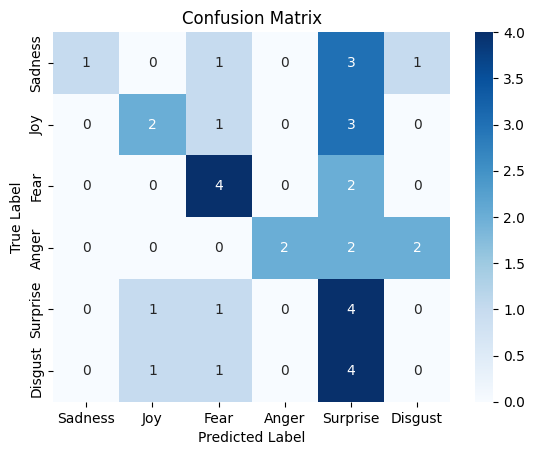

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# define class labels
labels = ['Sadness', 'Joy', 'Fear', 'Anger', 'Surprise', 'Disgust']

# create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# set plot labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# show plot
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true, y_pred, target_names=labels)

# Print report
print(report)



              precision    recall  f1-score   support

     Sadness       1.00      0.33      0.50         6
         Joy       0.00      0.00      0.00         6
        Fear       0.50      0.67      0.57         6
       Anger       0.50      0.33      0.40         6
    Surprise       1.00      0.17      0.29         6
     Disgust       0.22      0.67      0.33         6

    accuracy                           0.36        36
   macro avg       0.54      0.36      0.35        36
weighted avg       0.54      0.36      0.35        36



In [ ]:
#4.2
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true, y_pred, labels=['Joy'], zero_division=0)

# Print the classification report
print(report)


              precision    recall  f1-score   support

         Joy       0.50      0.33      0.40         6

   micro avg       0.50      0.33      0.40         6
   macro avg       0.50      0.33      0.40         6
weighted avg       0.50      0.33      0.40         6



In [ ]:
print(test_data.columns)


Index(['Sadness Lexicons', 'Sadness Sentences', 'Joy Lexicons',
       'Joy Sentences', 'Fear Lexicons', 'Fear Sentences', 'Anger Lexicons',
       'Anger Sentences', 'Surprise Lexicons', 'Surprise Sentence',
       'Disgust Lexicons', 'Disgust Sentences', 'Sadness + Joy Lexicons',
       'Sadness + Joy Sentences', 'Fear + Anger Lexicons',
       'Fear + Anger Sentences', 'Surprise + Disgust Lexicons',
       'Surprise + Disgust Sentences', 'Sadness + Joy + Fear Lexicons',
       'Sadness + Joy + Fear Sentences', 'tokens'],
      dtype='object')
